<a href="https://colab.research.google.com/github/NAizdabezt/sgu_data_analysit/blob/main/EDA_PimaIndiansDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Exploratory Data Analysis (EDA) on Pima Indians Diabetes Dataset

## 1. Giới thiệu
Trong notebook này, chúng ta sẽ thực hiện phân tích dữ liệu khám phá (EDA)
trên bộ dữ liệu **Pima Indians Diabetes**, một tập dữ liệu y tế nổi tiếng được sử dụng để dự đoán nguy cơ mắc bệnh tiểu đường.

## 2. Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 3. Load dữ liệu

In [15]:
import pandas as pd

columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
    "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df = pd.read_csv("pima-indians-diabetes.data.csv", header=None, names=columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 4. Thông tin tổng quan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


## 5. Kiểm tra dữ liệu thiếu (giá trị 0 bất hợp lý)

In [17]:
zero_features = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
(df[zero_features] == 0).sum()


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


## 6. Phân phối các biến

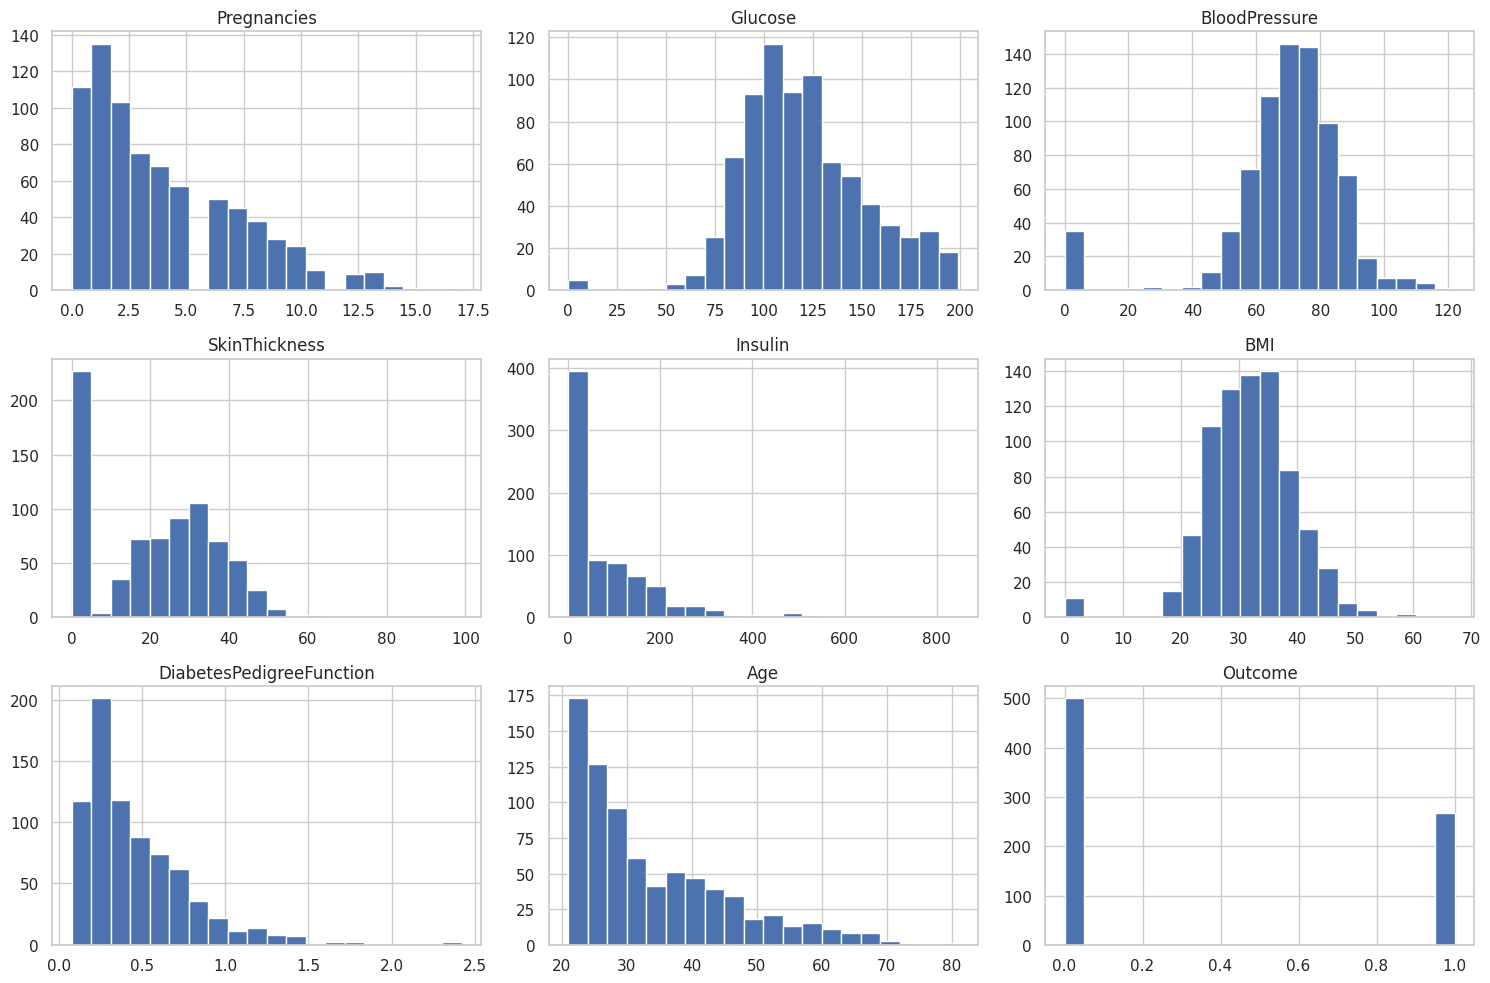

In [18]:
df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

## 7. So sánh nhóm mắc vs không mắc tiểu đường

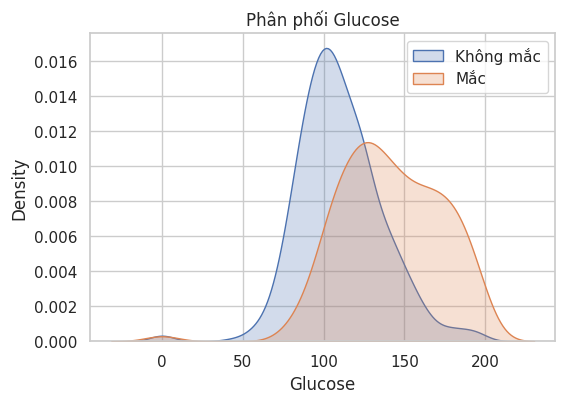

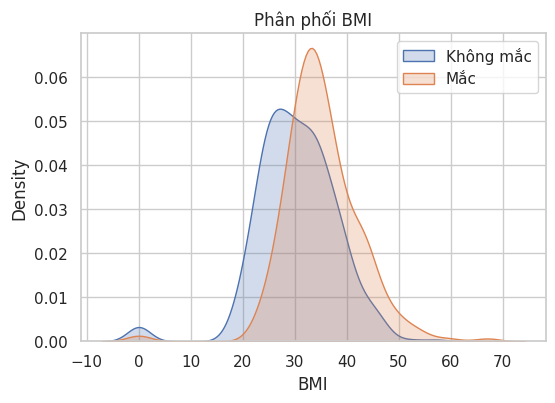

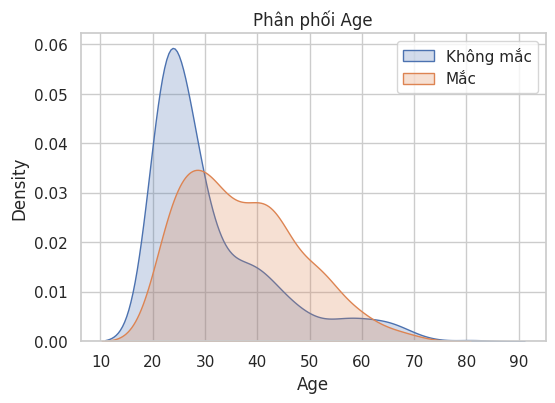

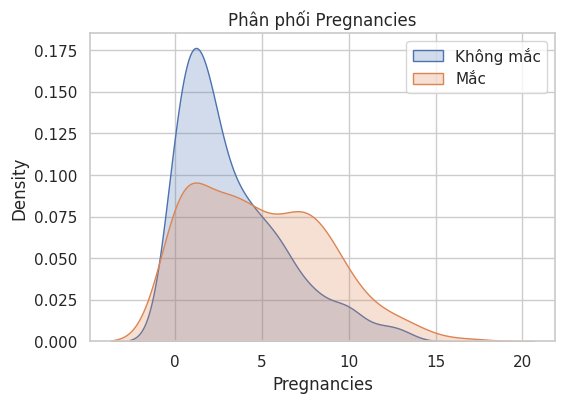

In [22]:
for col in ["Glucose","BMI","Age","Pregnancies"]:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df["Outcome"]==0][col], label="Không mắc", fill=True)
    sns.kdeplot(df[df["Outcome"]==1][col], label="Mắc", fill=True)
    plt.title(f"Phân phối {col}")
    plt.legend()
    plt.show()


## 8. Ma trận tương quan

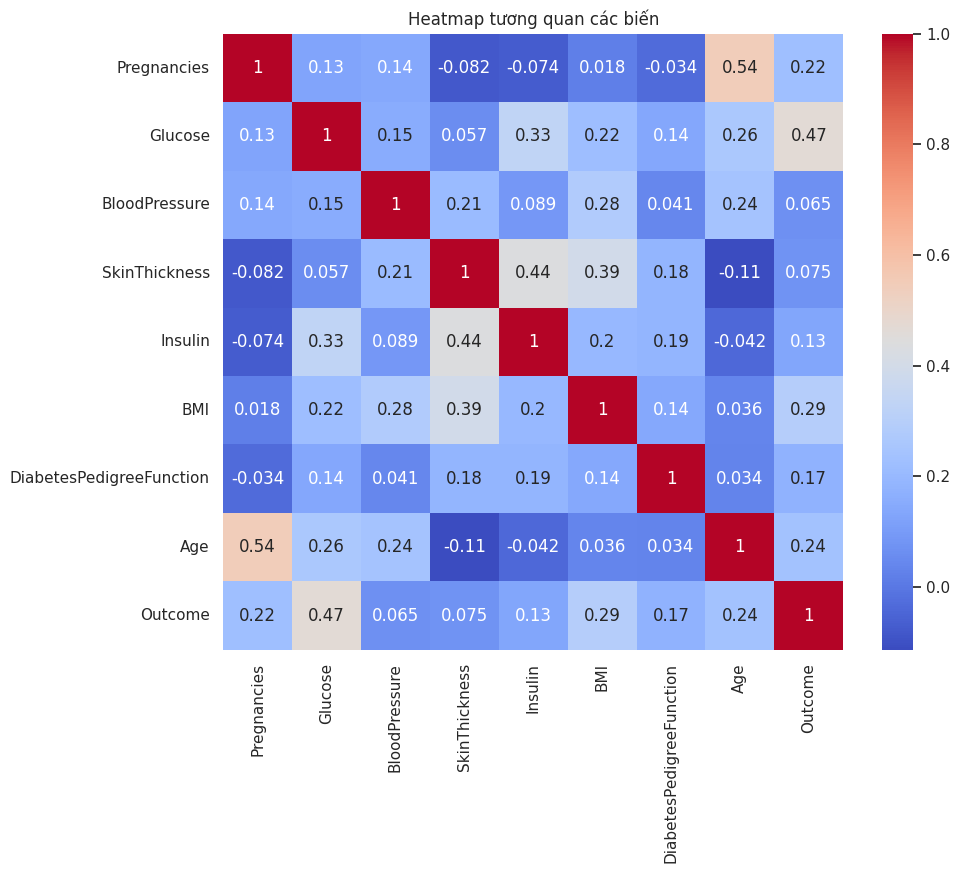

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap tương quan các biến")
plt.show()


## 9. Kết luận sơ bộ

- Các biến **Glucose** và **BMI** có liên quan mạnh đến biến mục tiêu.
- Dữ liệu có nhiều giá trị 0 bất hợp lý ở **Insulin, SkinThickness** cần xử lý trước khi huấn luyện.
- Nhãn mất cân bằng nhẹ (65% không mắc, 35% mắc).
